In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pm25-airpolution-dataset/PRSA_data_2010.1.1-2014.12.31.csv


# Inuebytes INTERNSHIP PROJECT-2 (DATA SCIENCE)

## INDEX

## 1. Data Preprocessing
## 2. Exploratory Data Analysis (EDA)
## 3. Model Implementation
## 4. Model Evaluation
## 5. Cross Validation
## Question And Answers

### 1. Data Processsing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,r2_score, mean_squared_error, mean_absolute_percentage_error

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pm = pd.read_csv("/kaggle/input/pm25-airpolution-dataset/PRSA_data_2010.1.1-2014.12.31.csv")

In [4]:
pm.shape

(43824, 13)

In [5]:
pm.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [6]:
pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [7]:
pm.describe

<bound method NDFrame.describe of           No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
0          1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW    1.79   
1          2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW    4.92   
2          3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW    6.71   
3          4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW    9.84   
4          5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW   12.97   
...      ...   ...    ...  ...   ...    ...   ...   ...     ...  ...     ...   
43819  43820  2014     12   31    19    8.0   -23  -2.0  1034.0   NW  231.97   
43820  43821  2014     12   31    20   10.0   -22  -3.0  1034.0   NW  237.78   
43821  43822  2014     12   31    21   10.0   -22  -3.0  1034.0   NW  242.70   
43822  43823  2014     12   31    22    8.0   -22  -4.0  1034.0   NW  246.72   
43823  43824  2014     12   31    23   12.0   -21  -3.0  1034.0   NW  249.85   

     

In [8]:
pm.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [9]:
# Remove missing value
pm_2 = pm.drop(['No'], axis=1)
pm_clean= pm_2.dropna()
pm_clean.isna().sum()

year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [10]:
pm_clean.shape

(41757, 12)

In [11]:
pm_clean.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


In [12]:
pm_clean.columns

Index(['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd',
       'Iws', 'Is', 'Ir'],
      dtype='object')

In [13]:
pm_clean.dtypes

year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [14]:
pm_clean['cbwd'].value_counts()

SE    14573
NW    13484
cv     8944
NE     4756
Name: cbwd, dtype: int64

In [15]:
pm_clean.replace({'cbwd':{'SE':0, 'NW':1, 'cv':2, 'NE':3}}, inplace = True)

/tmp/ipykernel_20/1587231526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm_clean.replace({'cbwd':{'SE':0, 'NW':1, 'cv':2, 'NE':3}}, inplace = True)


In [16]:
pm_clean['cbwd'].value_counts()

0    14573
1    13484
2     8944
3     4756
Name: cbwd, dtype: int64

In [17]:
x = pm_clean.loc[:, ~pm_clean.columns.isin(['pm2.5'])]

In [18]:
y = pm_clean['pm2.5']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [21]:
x_train_new=ss.fit_transform(x_train)
x_test_new=ss.transform(x_test)

### 2. Exploratory Data Analysis (EDA)

In [22]:
pm_clean.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,1.092990,23.866747,0.055344,0.194866
std,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,1.005063,49.617495,0.778875,1.418165
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,0.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,1.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,2.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,3.000000,565.490000,27.000000,36.000000


<Axes: >

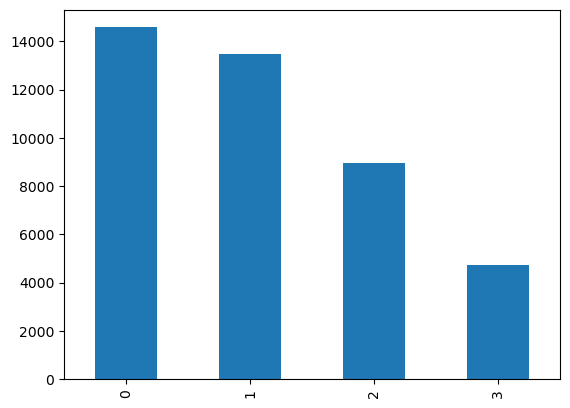

In [23]:
pm_clean['cbwd'].value_counts().plot.bar()

<Axes: xlabel='DEWP', ylabel='Count'>

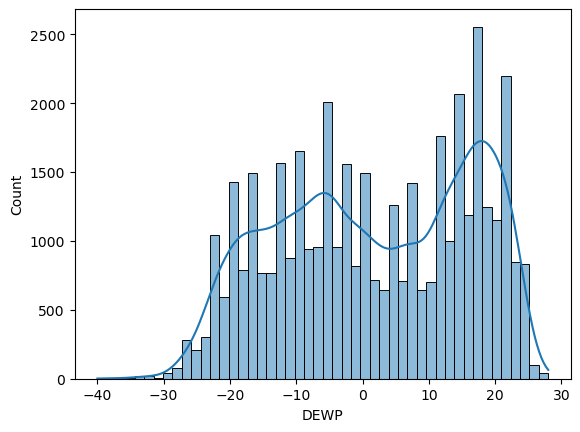

In [24]:
sns.histplot(pm_clean['DEWP'],kde='true')

<Axes: ylabel='Frequency'>

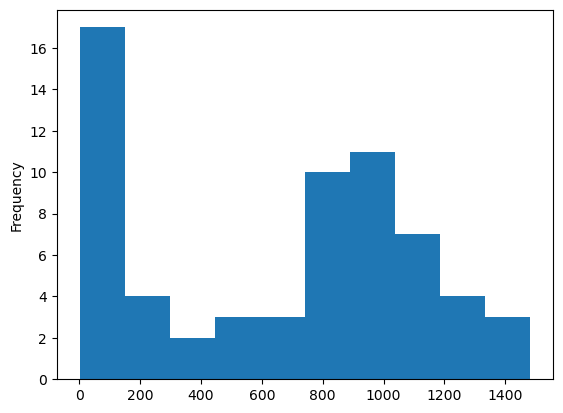

In [25]:
pm_clean['TEMP'].value_counts().plot.hist()

<Axes: xlabel='TEMP', ylabel='Count'>

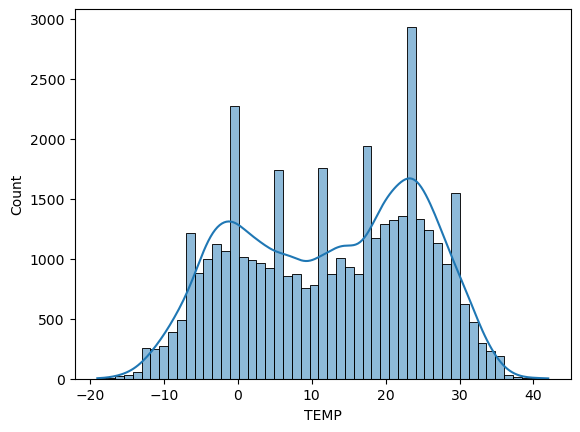

In [26]:
sns.histplot(pm_clean['TEMP'],kde='true')

<Axes: xlabel='DEWP', ylabel='Density'>

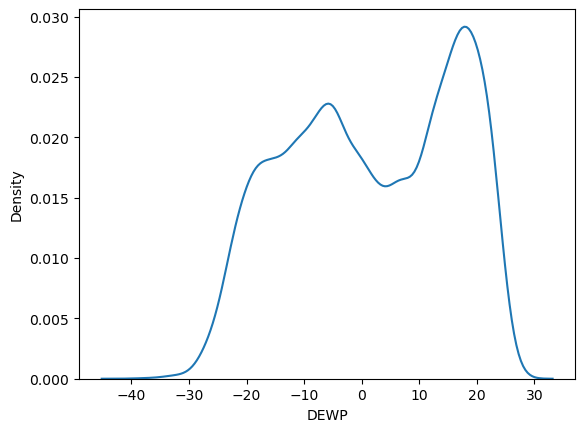

In [27]:
sns.kdeplot(pm_clean['DEWP'])

<Axes: >

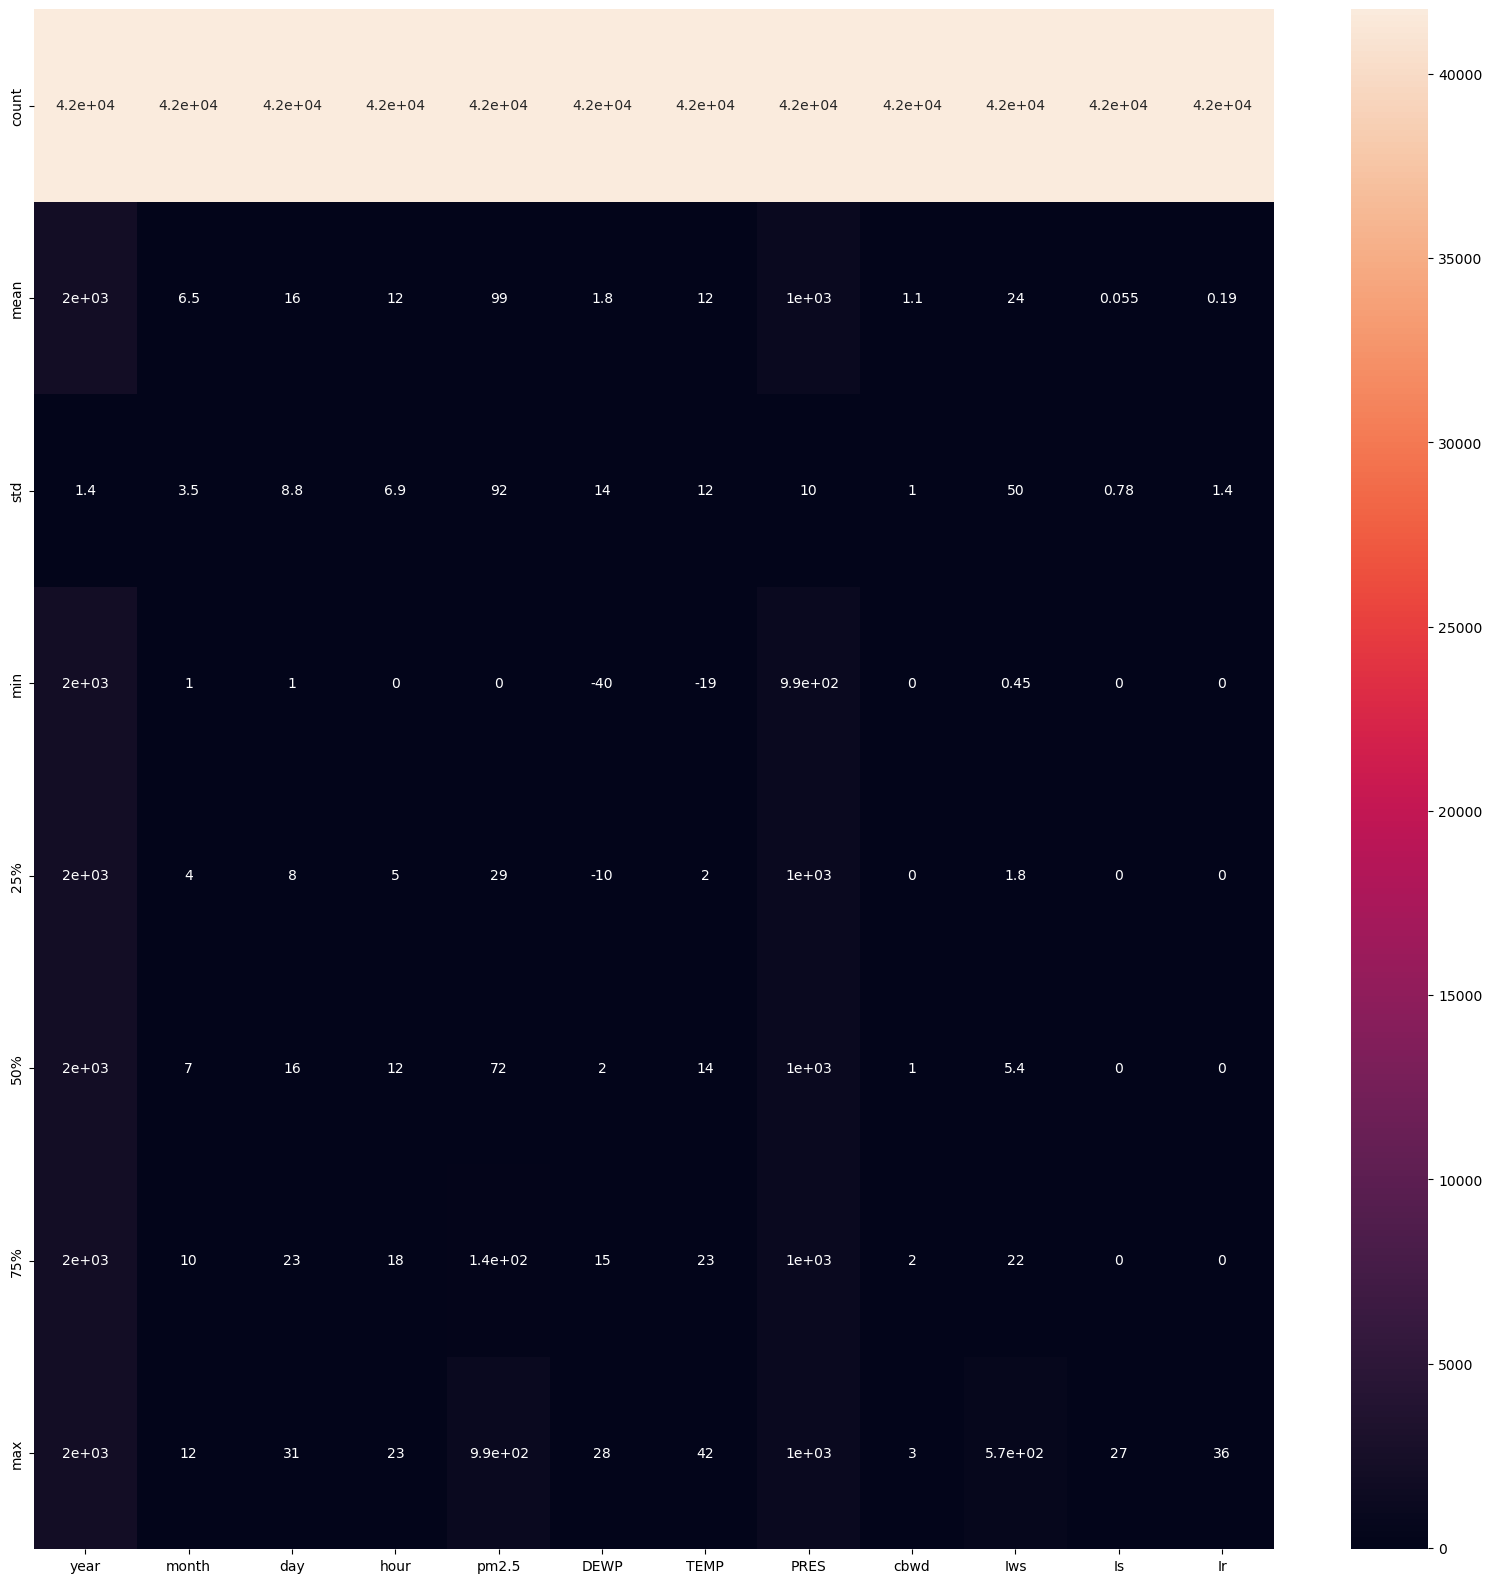

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(pm_clean.describe(),annot=True)

### **3. Model Implimentation**

* Ridge Resgressor

In [29]:
rr = Ridge()
rr.fit(x_train_new, y_train)
y_pred1 = rr.predict(x_test_new)

* Linear Regressor

In [30]:
lr = RandomForestRegressor(random_state = 2529)
lr.fit(x_train_new, y_train)
y_pred2 = lr.predict(x_test_new)

### **4. Model Evaluation**

* Ridge Resgressor

In [31]:
r2 = r2_score(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
mape = mean_absolute_percentage_error(y_test, y_pred1)

print("Ridge R2 Score:", int(100*r2),"%")
print("Ridge Mean Square Error:", mse)
print("Ridge Mean Absolutre Percentage Error:", mape)

Ridge R2 Score: 25 %
Ridge Mean Square Error: 6543.595573904094
Ridge Mean Absolutre Percentage Error: 1.3972602938689136


* Linear Resgressor

In [32]:
r2 = r2_score(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
mape = mean_absolute_percentage_error(y_test, y_pred2)

print("Linear Regressor R2 Score:", int(100*r2),"%")
print("Linear Regressor Mean Square Error:", mse)
print("Linear Regressor Mean Absolute Percentage Error:", mape)

Linear Regressor R2 Score: 83 %
Linear Regressor Mean Square Error: 1479.055730651341
Linear Regressor Mean Absolute Percentage Error: 0.4625110389260622


### **5. Cross Validation**

In [33]:
from sklearn.model_selection import cross_val_score

* Ridge Resgressor

In [34]:
scores1 = cross_val_score(rr, x_train_new, y_train, cv=10)
scores1

array([0.26421285, 0.25709996, 0.24969478, 0.25450657, 0.26674251,
       0.26964883, 0.26703525, 0.26531221, 0.26213327, 0.25083841])

* Linear Resgressor

In [35]:
scores2 = cross_val_score(lr, x_train_new, y_train, cv=10)
scores2

array([0.83403507, 0.81331789, 0.82208658, 0.81523214, 0.8375752 ,
       0.83211377, 0.83268228, 0.85805018, 0.85576936, 0.83396693])

### Question And Answers

Question-1. What challenges did you encounter while prepraing the dataset at preprocessing and EDA analysis?

**Answer -** I have to a convert categorical data to numerical data and remove Null value

Question-2. Descirbe the difference observed while modelling with linear and logistic regressor.

**Answer -** The main difference between them is how they are being used. Linear Regression is used to solve Regression problems whereas Logistic Regression is used to solve Classification problems

Question-3. How did you evaluate the performance of the linear and logestic regressor?

**Answer -** I used R2 Score, Mean Square Error and Mean Absolutre Percentage Error

Question-4. Did you observe any sign of overfitting during training? If so, how did you handle it?

**Answer -** The performance of the model on the training dataset is significantly better than the performance on the test dataset, then the model may have overfit the training dataset. Testing the machine learning models on more data with with comprehensive representation of possible input data values and types.

Question-5. How well did you model perform on testing set compared to the training set?

**Answer -** Its performed quite good on testing set compared to the training set

Question-6. how did you choose the number of cluser for the K-means algorithm? Explain why?

**Answer -** I used the Elbow Method to determine the number of cluster for the K-means Algorithm